In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Clustering simulation results to discover inequality patterns
#### Bramka Arga Jafino

A brainstorming notebook for my ongoing PhD research

Suppose a simulation model has two outcome variables: welfare of actor A and welfare of actor B.
    
For proof of concept purpose, we just randomly generate the results of this model 

In [2]:
m1 = 25
m2 = 60

a_m1 = np.random.uniform(m1-10, m1+10, 30)
b_m1 = np.random.uniform(m1-10, m1+10, 30)

a_m2 = np.random.uniform(m2-10, m2+10, 30)
b_m2 = np.random.uniform(m2-10, m2+10, 30)

In [3]:
df = pd.DataFrame()
df['a'] = np.append(a_m1, a_m2)
df['b'] = np.append(b_m1, b_m2)

Let's plot them in a scatterplot

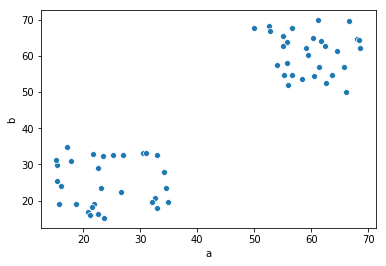

In [4]:
sns.scatterplot(data=df, x='a', y='b')

Now if we use k-means clustering to generate two clusters, as could be logically deduced, one cluster will be datasets in the top right of the graph and another one on the bottom left

In [5]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(df)
df['label_0'] = kmeans.labels_

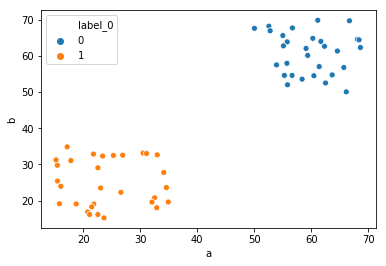

In [6]:
sns.scatterplot(data=df, x='a', y='b', hue='label_0')

This is because k-means (and other clustering algorithms) basically attempts to minimize the distance between data points.

In our case, our concern is identifying losers and winners in each simulation result. Within each cluster, we can see that different actors become winners and losers.

This can be observed by calculating variable 'a/b' which simply calculates the relative performance of actor A to actor B. We can then cluster datasets with the median of 'a/b' as the threshold (one cluster which 'a/b' values are above the median, another one below median)

In [7]:
df['a/b'] = df['a'] / df['b']
med = np.median(df['a/b'])
df['label_1'] = df['a/b'].apply(lambda x: 0 if x < med else 1)

In [11]:
med

0.9860193469024755

In [9]:
df.head(5)

,a,b,label_0,a/b,label_1
0,17.194974,34.850193,1,0.493397,0
1,34.933397,19.628322,1,1.779744,1
2,20.800389,16.871539,1,1.232869,1
3,34.141947,27.772684,1,1.229336,1
4,32.531768,20.779362,1,1.565581,1


In [10]:
df.tail(5)

,a,b,label_0,a/b,label_1
55,60.283000,64.802220,0,0.930261,0
56,68.388930,64.397780,0,1.061977,1
57,61.695404,63.952207,0,0.964711,0
58,59.381040,60.089227,0,0.988214,1
59,63.678831,54.705344,0,1.164033,1


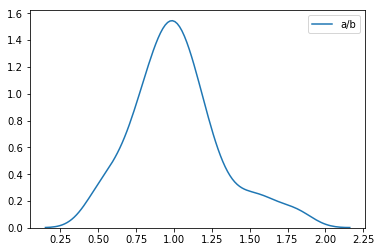

In [13]:
sns.kdeplot(df['a/b'])

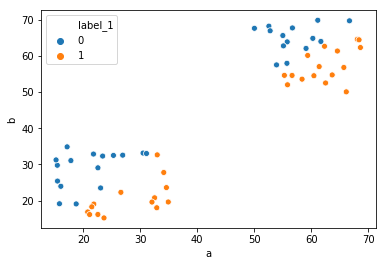

In [8]:
sns.scatterplot(data=df, x='a', y='b', hue='label_1')

We can see that the generated cluster differs from the original cluster by the K-means. Cluster 0 contains outcomes where actor B is better-off, while cluster 1 contains outcomems where actor A is better-off.

The points I'm trying to make are:
- In our case (23 variables of welfare of 23 districts), we cannot simply apply clustering algorithms to the simulation results database, as our goal is identifying inequality patterns
- Hence, two alternative ways to move forward:
    - Post processing of the simulation results. The example above only has two actors, we must find a way to generalize to n actors (probably there are already published works, but I don't recall one yet)
    - Alternative distance metrics for the clustering algorithm (so not simply using euclidean distance)